<a href="https://colab.research.google.com/github/Sourav-Manik/AI_Deep_Learning/blob/main/CNN_Alexnet_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense, Flatten, Dropout, Activation, MaxPool2D
import numpy as np
from matplotlib import pyplot as plt

#2. Import Dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


#3. Data Understanding

In [ ]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train.std(), X_test.std()

(64.1500758911213, 64.06097012299574)

Apply Normalization for better learning

In [ ]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [ ]:
X_train = X_train/255
X_test = X_test/255

#4. Model Building

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape = (32,32,3),filters = 96,kernel_size = 11,strides = 4,padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2),padding ='same'))
model.add(Conv2D(filters = 256,kernel_size = 5,strides = 1,padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2),padding ='same'))

model.add(Conv2D(filters = 384,kernel_size = 3,strides = 1,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 384,kernel_size = 3,strides = 1,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 256,kernel_size = 3,strides = 1,padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2),padding ='same'))

model.add(Flatten())
model.add(Dense(units = 4096, activation = 'tanh'))
model.add(Dropout(rate = 0.30))
model.add(Dense(units = 4096, activation = 'tanh'))
model.add(Dropout(rate = 0.30))
model.add(Dense(units = 4096, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 384)         1

Model Compilation

In [ ]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy',metrics='sparse_categorical_accuracy')

# 5. Model Training

In [ ]:
model_training = model.fit(x=X_train,y=y_train,batch_size = 32,epochs = 25, validation_data=(X_test,y_test),verbose = 2)

Epoch 1/25
1563/1563 - 30s - loss: 2.6481 - sparse_categorical_accuracy: 0.1318 - val_loss: 2.0976 - val_sparse_categorical_accuracy: 0.1751 - 30s/epoch - 19ms/step
Epoch 2/25
1563/1563 - 18s - loss: 2.0182 - sparse_categorical_accuracy: 0.2226 - val_loss: 1.8447 - val_sparse_categorical_accuracy: 0.3022 - 18s/epoch - 11ms/step
Epoch 3/25
1563/1563 - 18s - loss: 1.7587 - sparse_categorical_accuracy: 0.3315 - val_loss: 2.0275 - val_sparse_categorical_accuracy: 0.2867 - 18s/epoch - 11ms/step
Epoch 4/25
1563/1563 - 18s - loss: 1.5569 - sparse_categorical_accuracy: 0.4217 - val_loss: 1.7189 - val_sparse_categorical_accuracy: 0.3659 - 18s/epoch - 11ms/step
Epoch 5/25
1563/1563 - 18s - loss: 1.4345 - sparse_categorical_accuracy: 0.4732 - val_loss: 1.4693 - val_sparse_categorical_accuracy: 0.4623 - 18s/epoch - 11ms/step
Epoch 6/25
1563/1563 - 19s - loss: 1.3429 - sparse_categorical_accuracy: 0.5095 - val_loss: 1.3389 - val_sparse_categorical_accuracy: 0.5096 - 19s/epoch - 12ms/step
Epoch 7/25

# 6. Model Evaluation

<function matplotlib.pyplot.show(*args, **kw)>

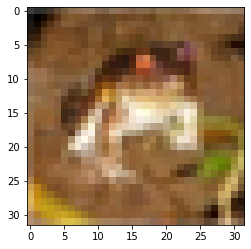

In [ ]:
plt.imshow(X_train[0])
plt.show

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = np.reshape(a= y_train, newshape = -1,)
y_test = np.reshape(a=y_test,newshape = -1,)
y_train.shape,y_test.shape

((50000,), (10000,))

In [ ]:
class_names[y_train[0]]

'frog'

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

1563/1563 [==============================] - 5s 3ms/step


<function matplotlib.pyplot.show(*args, **kw)>

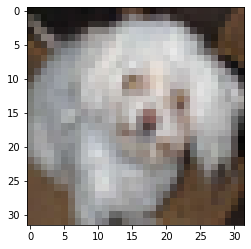

In [ ]:
plt.imshow(X_test[1000])
plt.show

In [ ]:
np.argmax(y_test[1000])

0

# 7. Model Prediction

In [ ]:
prediction = model.predict(X_test)
prediction
print(np.argmax(prediction[29]))

313/313 [==============================] - 1s 3ms/step
6


In [ ]:
y_test[29]

6

# 8. Model Performance

## Model Accuracy Performance

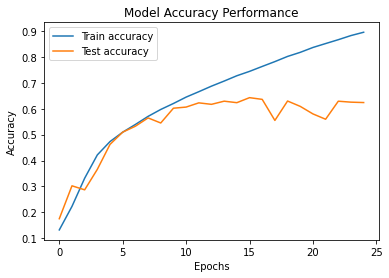

In [ ]:
plt.plot(model_training.history['sparse_categorical_accuracy'],label = 'Train accuracy')

plt.plot(model_training.history['val_sparse_categorical_accuracy'],label='Test accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Performance')
plt.legend()
plt.show()

##Model Loss Performance

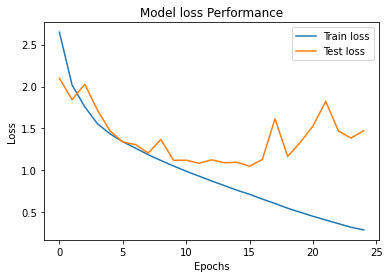

In [ ]:
plt.plot(model_training.history['loss'],label = 'Train loss')

plt.plot(model_training.history['val_loss'],label='Test loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss Performance')
plt.legend()
plt.show()